In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [70]:
#Finding the value to replace the NA values

age_mean = data['age'].mean()
deck_mode = data['deck'].mode()
embarked_mode = data['embarked'].mode()
embark_town_mode = data['embark_town'].mode()
embark_town_mode[0]

'Southampton'

In [71]:
data['age'].fillna(value = age_mean,inplace = True)
data['deck'].fillna(value = deck_mode[0], inplace = True)
data['embarked'].fillna(value = embarked_mode[0],inplace = True)
data['embark_town'].fillna(value= embark_town_mode[0], inplace = True)
data.isnull().sum()
data.drop(columns=['alone'],inplace = True)

In [53]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,C,Southampton,no
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,C,Cherbourg,yes
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,C,Southampton,yes
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,C,Southampton,yes
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,C,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,C,Southampton,no
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,B,Southampton,yes
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,C,Southampton,no
889,1,1,male,26.000000,0,0,30.0000,C,First,man,C,Cherbourg,yes


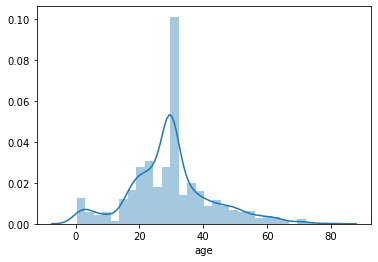

In [72]:
sns.distplot(data.age)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

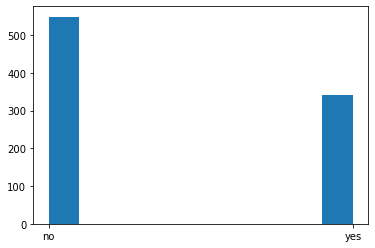

In [73]:
plt.hist(data.alive)

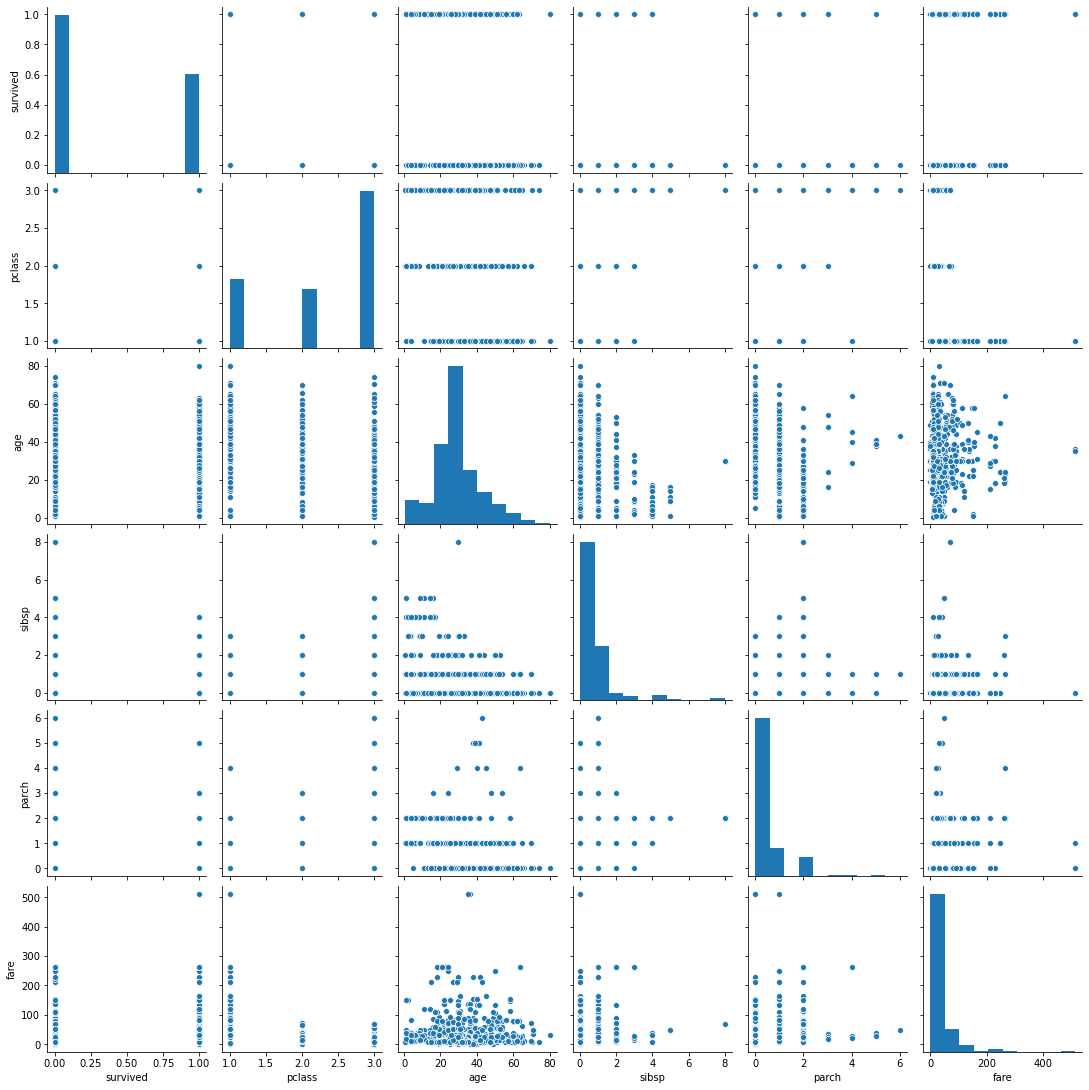

In [54]:
sns.pairplot(data)

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
x = data['deck']
data['deck'] = le.fit_transform(x)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,2,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,2,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,2,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,2,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,2,Southampton,no


In [76]:
y = data['survived']
X = data.iloc[:,1:]
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
0,3,male,22.0,1,0,7.2500,S,Third,man,True,2,Southampton,no
1,1,female,38.0,1,0,71.2833,C,First,woman,False,2,Cherbourg,yes
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,2,Southampton,yes
3,1,female,35.0,1,0,53.1000,S,First,woman,False,2,Southampton,yes
4,3,male,35.0,0,0,8.0500,S,Third,man,True,2,Southampton,no


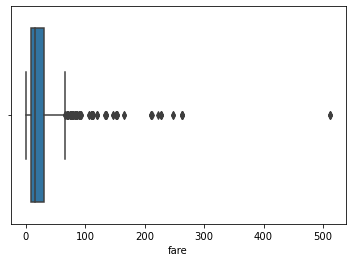

In [77]:
sns.boxplot(data.fare)


In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=67)
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive
395,3,male,22.0,0,0,7.7958,S,Third,man,2,Southampton,no
231,3,male,29.0,0,0,7.7750,S,Third,man,2,Southampton,no
705,2,male,39.0,0,0,26.0000,S,Second,man,2,Southampton,no
315,3,female,26.0,0,0,7.8542,S,Third,woman,2,Southampton,yes
750,2,female,4.0,1,1,23.0000,S,Second,child,2,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7,3,male,2.0,3,1,21.0750,S,Third,child,2,Southampton,no
453,1,male,49.0,1,0,89.1042,C,First,man,2,Cherbourg,yes
714,2,male,52.0,0,0,13.0000,S,Second,man,2,Southampton,no
821,3,male,27.0,0,0,8.6625,S,Third,man,2,Southampton,yes


In [87]:
per99  = data.fare.quantile(0.99)
per99

151.55

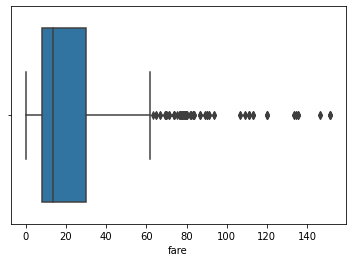

In [88]:
data = data[data.fare<=per99]
sns.boxplot(data.fare)

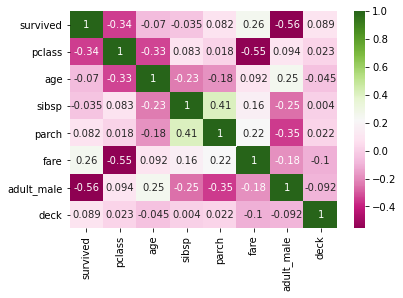

In [80]:
sns.heatmap(data.corr(),annot=True,cmap='PiYG')

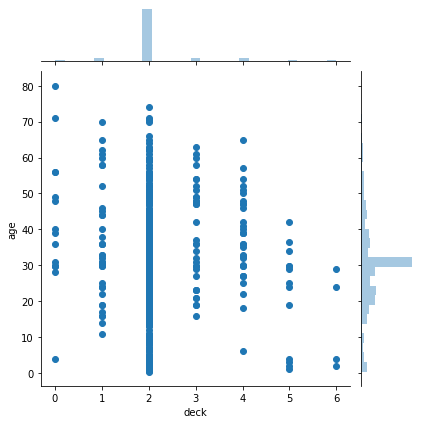

In [91]:
sns.jointplot(data.deck,data.age)

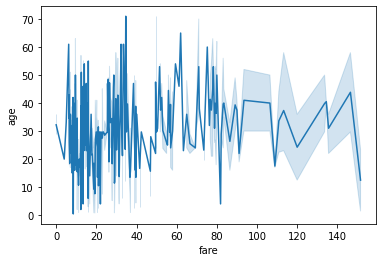

In [93]:
sns.lineplot(data['fare'],data['age'])

([<matplotlib.patches.Wedge at 0x23672d462e0>,
 [Text(-0.729894377650598, 0.822954553711228, 'Southampton'),
  Text(0.4747025628363679, -0.9922990863830241, 'Cherbourg'),
  Text(1.0573634607995026, -0.3032861878920618, 'Queenstown')],
 [Text(-0.3981242059912352, 0.4488843020243062, '73.1'),
  Text(0.25892867063801883, -0.5412540471180131, '18.0'),
  Text(0.5767437058906377, -0.16542882975930642, '8.9')])

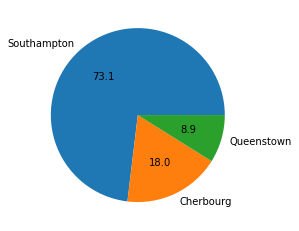

In [98]:
data['embark_town'].value_counts()
plt.pie(data.embark_town.value_counts(),labels = ['Southampton','Cherbourg','Queenstown'],autopct='%0.1f')
